<a href="https://colab.research.google.com/github/AndrewOrozco/CursoGit/blob/master/Dise%C3%B1o_experimental.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import os
import urllib.request
import matplotlib.pyplot as plt
import random
import shutil

In [ ]:
# Función para descargar un archivo desde una URL
def descargar_archivo(url, nombre_archivo):
    urllib.request.urlretrieve(url, nombre_archivo)

# URL del archivo zip del LFW Dataset
url_lfw_dataset = "http://vis-www.cs.umass.edu/lfw/lfw.tgz"
nombre_zip_lfw = "lfw.tgz"

# Descargar el archivo zip del LFW Dataset
descargar_archivo(url_lfw_dataset, nombre_zip_lfw)

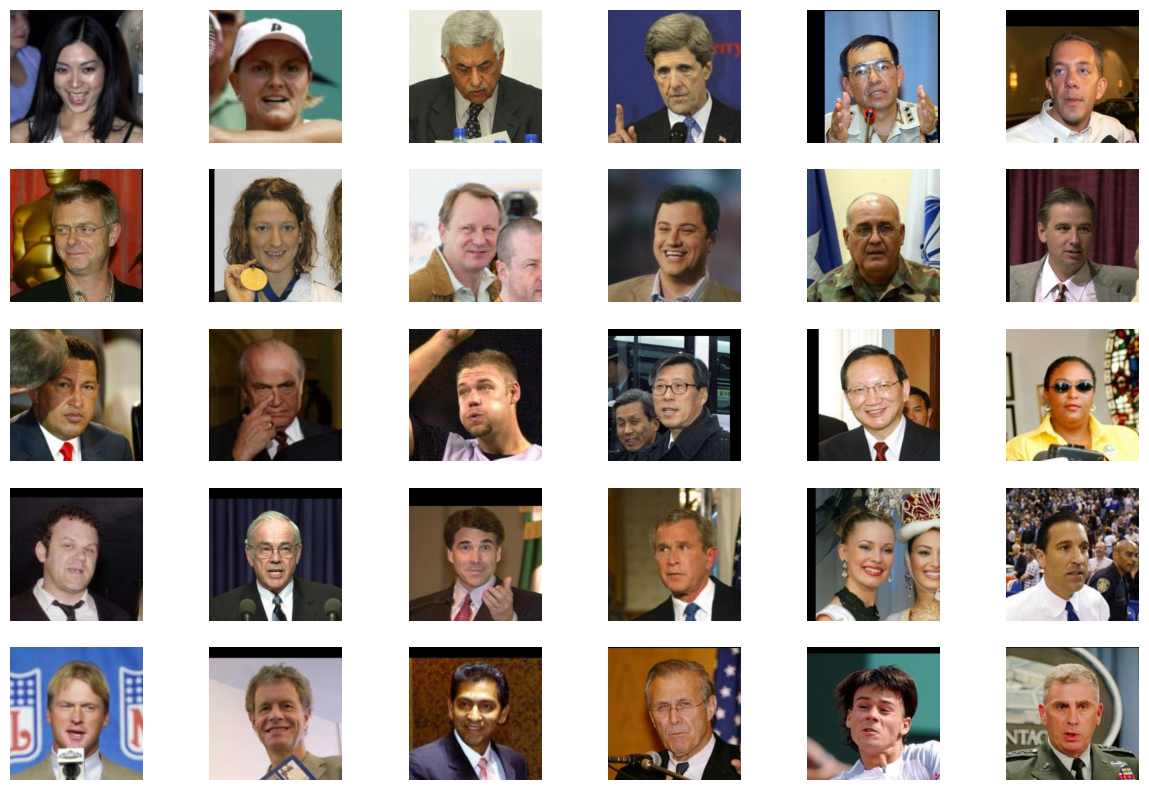

In [ ]:
# Descomprimir el archivo zip
os.system(f"tar -xvzf {nombre_zip_lfw}")

# Directorio donde se encuentran las imágenes
ruta_lfw_dataset = "lfw/"

# Filtrar solo los archivos de imágenes
extensiones_validas = [".jpg"]

# Lista para almacenar las rutas a las imágenes
rutas_imagenes = []

# Recorrer recursivamente todos los subdirectorios
for dirpath, dirnames, archivos in os.walk(ruta_lfw_dataset):
    for archivo in archivos:
        # Comprobar si el archivo tiene una extensión de imagen válida
        if any(archivo.endswith(ext) for ext in extensiones_validas):
            # Si el archivo es una imagen, añadir la ruta a la lista
            rutas_imagenes.append(os.path.join(dirpath, archivo))

# Seleccionar aleatoriamente un subconjunto de las rutas a las imágenes
rutas_imagenes_seleccionadas = random.sample(rutas_imagenes, 30)  # Cambia el número a la cantidad de imágenes que quieras mostrar

# Leer y mostrar las imágenes seleccionadas
plt.figure(figsize=(15, 10))
for i, ruta_imagen in enumerate(rutas_imagenes_seleccionadas, 1):
    imagen = cv2.imread(ruta_imagen)
    imagen_rgb = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)
    plt.subplot(5, 6, i)
    plt.imshow(imagen_rgb)
    plt.axis("off")
plt.show()

In [ ]:
# Directorio donde se encuentran las imágenes
ruta_lfw_dataset = "lfw/"

# Directorio de destino donde se almacenarán las imágenes copiadas y renombradas
ruta_destino = "/content/ruta_nueva_imagenes"

# Contador para el nombre de las imágenes
contador = 1

# Crear el directorio de destino si no existe
os.makedirs(ruta_destino, exist_ok=True)

for dirpath, dirnames, archivos in os.walk(ruta_lfw_dataset):
    for archivo in archivos:
        # Comprobar si el archivo tiene una extensión de imagen válida
        if archivo.lower().endswith((".jpg", ".jpeg", ".png", ".gif")):
            # Obtener la ruta completa del archivo de origen
            ruta_origen = os.path.join(dirpath, archivo)

            # Generar el nuevo nombre de la imagen en el formato "persona_0001.jpg"
            nuevo_nombre = f"persona_{contador:05d}.jpg"

            # Crear la ruta completa de destino con el nuevo nombre
            ruta_destino_nuevo = os.path.join(ruta_destino, nuevo_nombre)

            # Copiar y renombrar la imagen al directorio de destino
            shutil.copyfile(ruta_origen, ruta_destino_nuevo)

            # Incrementar el contador para el siguiente nombre de imagen
            contador += 1

----------------Rostros detectados----------------


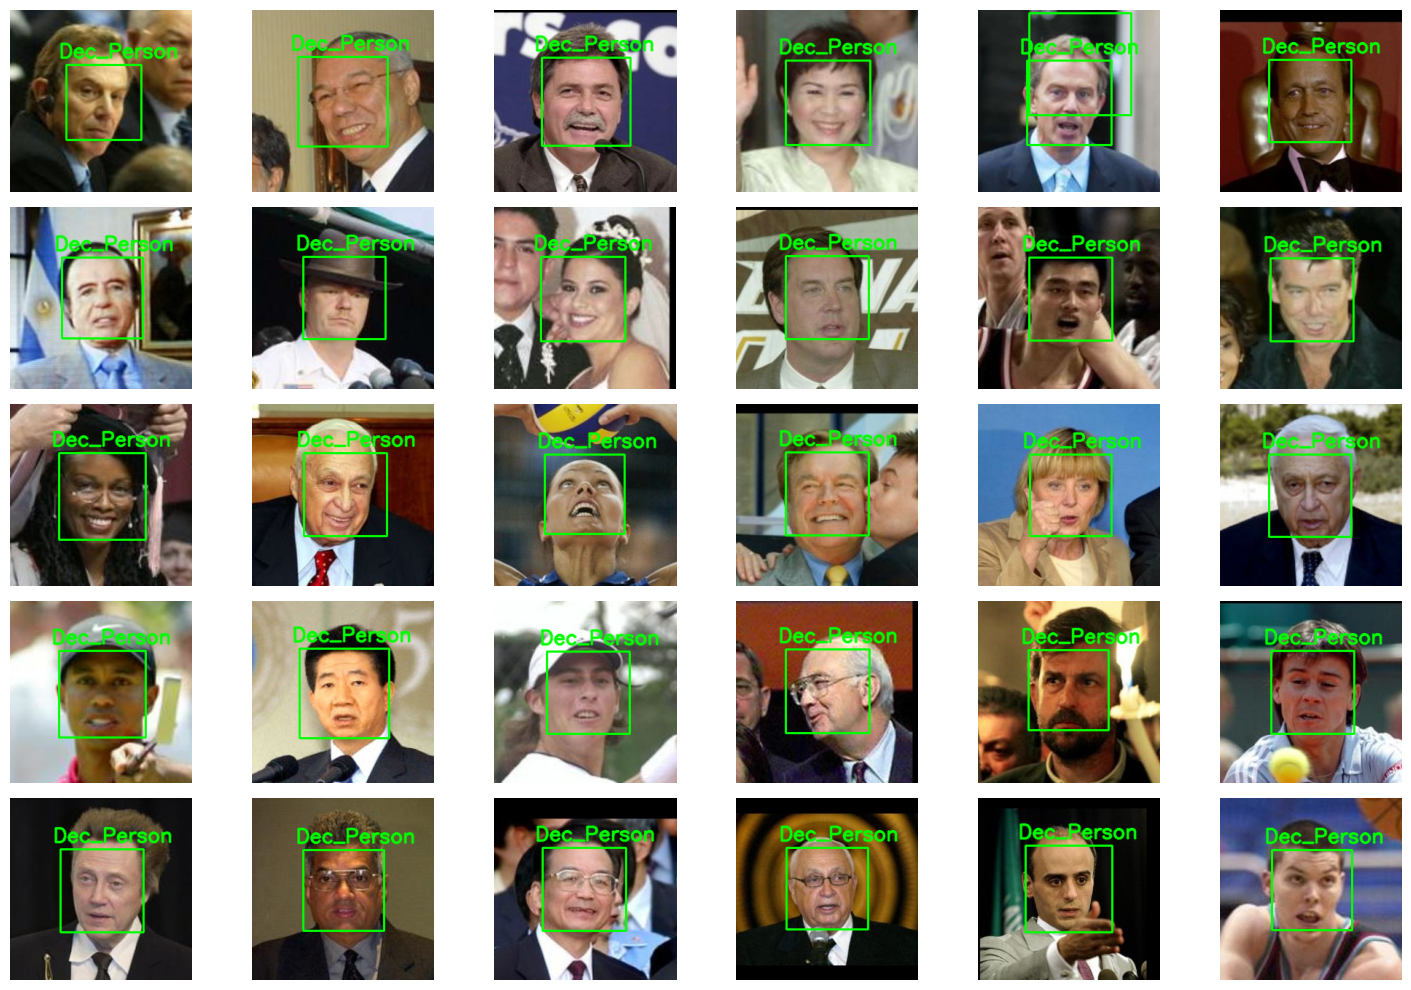

In [ ]:
# Ruta al directorio de imágenes
#ruta_fotos = "/content/imagen_sin_rostro"
ruta_fotos = "/content/ruta_nueva_imagenes"
# Cargar el clasificador Haar Cascade para la detección de rostros
cascade_path = "/content/haarcascade_frontalface_default.xml"

face_cascade = cv2.CascadeClassifier(cascade_path)

# Lista para almacenar las rutas de las imágenes con rostros detectados
imagenes_con_rostros = []

# Contador para el número de imágenes mostradas
contador_imagenes_mostradas = 0

count = 0

# Crear una figura para mostrar las imágenes con rostros detectados
plt.figure(figsize=(15, 10))

# Recorrer recursivamente todos los subdirectorios y detectar rostros en las imágenes
for dirpath, dirnames, archivos in os.walk(ruta_fotos):
    for archivo in archivos:
        # Comprobar si el archivo tiene una extensión de imagen válida
        if archivo.lower().endswith((".jpg", ".jpeg", ".png", ".gif")):
            # Obtener la ruta completa de la imagen
            ruta_imagen = os.path.join(dirpath, archivo)

            # Leer la imagen
            img = cv2.imread(ruta_imagen)

            # Convertir la imagen a escala de grises
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

            # Detectar rostros en la imagen
            rostros = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

            # Si se detectaron rostros, mostrar la imagen con los rostros detectados
            if len(rostros) > 0:
                # Dibujar rectángulos alrededor de los rostros detectados
                count = count+1
                if count == 1:
                    print("Rostros detectados".center(50, '-'))

                for (x, y, w, h) in rostros:
                    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
                    # Poner texto en la imagen
                    font = cv2.FONT_HERSHEY_SIMPLEX
                    cv2.putText(img, 'Dec_Person', (x-10, y-10), font, 0.9, (0,255,0), 2, cv2.LINE_AA)

                # Mostrar la imagen con los rostros detectados
                imagen_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

                # Añadir la imagen al subplot
                plt.subplot(5, 6, contador_imagenes_mostradas + 1)
                plt.imshow(imagen_rgb)
                plt.axis("off")
            # else:
            #     # print("Rostros no detectado".center(50, '-'))
            #     # Mostrar la imagen con los rostros detectados
            #     imagen_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            #     # Añadir la imagen al subplot
            #     plt.subplot(5, 6, contador_imagenes_mostradas + 1)
            #     plt.imshow(imagen_rgb)
            #     plt.axis("off")

                # Incrementar el contador de imágenes mostradas
                contador_imagenes_mostradas += 1

                # Agregar la ruta de la imagen a la lista de imágenes con rostros
                imagenes_con_rostros.append(ruta_imagen)

                # Si ya se han mostrado 30 imágenes, detener el proceso
                if contador_imagenes_mostradas >= 30:
                    break
    # Si ya se han mostrado 30 imágenes, detener el proceso
    if contador_imagenes_mostradas >= 30:
        break

# Ajustar el diseño de la figura
plt.tight_layout()

# Mostrar la figura con todas las imágenes
plt.show()
